<a href="https://colab.research.google.com/github/taylorec/Data-Structures-and-Algorithms-with-Python/blob/main/8)_Pattern_Matching_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A pattern matching algorithm is used to determine the index positions where a given pattern string (P) is matched in a text string (T)

#### Brute-force Algorithm

The brute-force algorithm simply tests all the possible combinations of the input pattern in the given string to find the position of the occurrence of the pattern. This algorithm is very naive and is not suitable if the text is very long.

The algorithm starts by comparing the first character of the text, that is, a, and the characters of the pattern. The first iteration shows there is a mismatch in the last character of the pattern. The algorithm shifts the pattern by one place before the second iteration. This method compares the characters of the pattern and the text string until we traverse the whole text string.

In [ ]:
def brute_force(text, pattern):
    l1 = len(text)      # The text which is to be checked for the existence of the pattern
    l2 = len(pattern)   # The pattern to be determined in the text
    i= 0
    j=0
 # looping variables are set to 0

    flag = False        # If the pattern doesn't appear at all, then set this to false and execute the last if statement
    while i < l1:       # iterating from the 0th index of text
        j = 0
        count = 0       # Count stores the length upto which the pattern and the text have matched
        while j < l2:
            if i+j<l1 and text[i+j] == pattern[j]:  # statement to check if a match has occoured or not
                count += 1                          # if the statement evaluates to true, then update count
            j += 1
        if count == l2:                             # if total number of successful matches is equal to count of the array
            print("\nPattern occours at index",i)   # print the starting index of the successful match
            flag = True                             # Even if the matching occours once, set this flag to True
        i += 1
    if not flag:                                    # If the pattern doesn't occours even once, this statement gets executed
        print('\nPattern is not at all present in the array')

brute_force('acbcabccababcaacbcaabacbbc','acbcaa')


Pattern occours at index 14


#### Rabin-karp Pattern matching Algorithm

The Rabin-Karp pattern matching algorithm is an improved version of the brute-force approach for finding the location of the given pattern in the text string. The performance of the Rabin-Karp algorithm is improved by reducing the number of comparisons with the help of hashing and is faster than the brute-force approach as it avoids unnecessary comparisons, character by character. The hash value of the pattern is compared with the hash of the substring of the text string all at once. If the hash values are not matched, the pattern is moved one position, and so there is no need to compare all the characters of the pattern one by one.

In [ ]:
def generate_hash(text, pattern):
    ord_text = [ord(i) for i in text]                              # stores unicode value of each character in text
    ord_pattern = [ord(j) for j in pattern]                        # stores unicode value of each character in pattern
    len_text = len(text)                                           # stores length of the text
    len_pattern = len(pattern)                                     # stores length of the pattern
    len_hash_array = len_text - len_pattern + 1                    # stores the length of new array that will contain the hash values of text
    hash_text = [0]*(len_hash_array)                               # Initialize all the values in the array to 0.
    hash_pattern = sum(ord_pattern)
    for i in range(0,len_hash_array):                              # step size of the loop will be the size of the pattern
        if i == 0:                                                 # Base condition
            hash_text[i] = sum(ord_text[:len_pattern])             # initial value of hash function
        else:
            hash_text[i] = ((hash_text[i-1] - ord_text[i-1]) + ord_text[i+len_pattern-1])   # calculating next hash value using previous value
    return [hash_text, hash_pattern]                               # return the hash values



def Rabin_Karp_Matcher(text, pattern):
    text = str(text)                                                     # convert text into string format
    pattern = str(pattern)                                               # convert pattern into string format
    hash_text, hash_pattern = generate_hash(text, pattern)               # generate hash values using generate_hash function
    len_text = len(text)                                                 # length of text
    len_pattern = len(pattern)                                           # length of pattern
    flag = False                                                         # checks if pattern is present atleast once or not at all
    for i in range(len(hash_text)):
        if hash_text[i] == hash_pattern:                                 # if the hash value matches
            count = 0                                                    # count stores the total characters upto which both are similar
            for j in range(len_pattern):
                if pattern[j] == text[i+j]:                              # checking equality for each character
                    count += 1                                           # if value is equal, then update the count value
                else:
                    break
            if count == len_pattern:                                     # if count is equal to length of pattern, it means match has been found
                    flag = True                                          # update flag accordingly
                    print('Pattern occours at index',i)
    if not flag:                                                         # if pattern doesn't match even once, then this if statement is executed
        print('Pattern is not at all present in the text')

Rabin_Karp_Matcher("101110000011010010101101","10112")

# Works for numeric
Rabin_Karp_Matcher("101110000011010010101101","1011")

# Works for alphabets
Rabin_Karp_Matcher("ABBACCADABBACCEDF","ACCE")

# Works for alpha numeric
Rabin_Karp_Matcher("abc1-3klm890zsdoifjwej8cjv09wn vn09aej09jv 09wje09cj 09 j093j0 9j 092j3 09c09", "09w")

Pattern is not at all present in the text
Pattern occours at index 0
Pattern occours at index 18
Pattern occours at index 11
Pattern occours at index 26
Pattern occours at index 43


#### Boyer-Moore Algorithm

The Boyer-Moore algorithm compares the pattern over the text from right to left. It uses the information of the various possible alignments in the pattern by preprocessing it. The main idea of this algorithm is that we compare the end characters of the pattern with the text. If they do not match, then the pattern can be moved on further.

The Boyer-Moore algorithm compares the pattern and the text string in the direction from right to left. It uses the bad character heuristic to shift the pattern. According to the bad character shift concept, if there is a mismatch between the character of the pattern and the text, then we check if the mismatched character of the text occurs in the pattern or not.

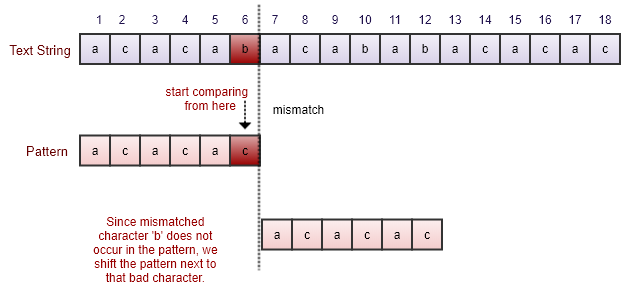


A different example:


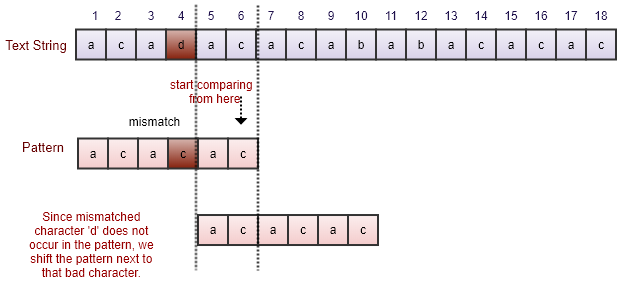

Good suffix heuristic is based on the matched suffix. Here, we shift the pattern to the right in such a way that the matched suffix subpattern is aligned with another occurrence of the same suffix in the pattern. It works like this: we start by comparing the pattern and the text string from right to left. If we find any mismatch, then we check the occurrence of the suffix that we have matched so far.

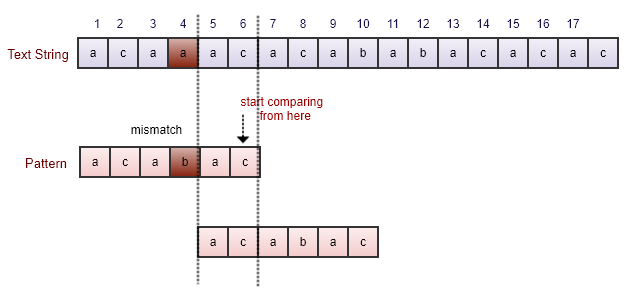

In [ ]:
text = "acbaacacababacacac"
pattern = "acacac"


matched_indexes = []

i=0
flag = True
while i<=len(text)-len(pattern):
    for j in range(len(pattern)-1, -1, -1):     #reverse searching
        if pattern[j] != text[i+j]:
            flag = False    #indicates there is a mismatch
            if j == len(pattern)-1:     #if good-suffix is not present, we test bad character
                if text[i+j] in pattern[0:j]:
                    i=i+j-pattern[0:j].rfind(text[i+j])   #i+j is index of bad character, this line is used for jumping pattern to match bad character of text with same character in pattern
                else:
                    i=i+j+1     #if bad character is not present, jump pattern next to it
            else:
                k=1
                while text[i+j+k:i+len(pattern)] not in pattern[0:len(pattern)-1]:     #used for finding sub part of a good-suffix
                    k=k+1
                if len(text[i+j+k:i+len(pattern)]) != 1:    #good-suffix should not be of one character
                    gsshift=i+j+k-pattern[0:len(pattern)-1].rfind(text[i+j+k:i+len(pattern)])    #jumps pattern to a position where good-suffix of pattern matches with good-suffix of text
                else:
                    #gsshift=i+len(pattern)
                    gsshift=0   #when good-suffix heuristic is not applicable, we prefer bad character heuristic
                if text[i+j] in pattern[0:j]:
                    bcshift=i+j-pattern[0:j].rfind(text[i+j])   #i+j is index of bad character, this line is used for jumping pattern to match bad character of text with same character in pattern
                else:
                    bcshift=i+j+1
                i=max((bcshift, gsshift))
            break
    if flag:    #if pattern is found then normal iteration
        matched_indexes.append(i)
        i = i+1
    else:   #again set flag to True so new string in text can be examined
        flag = True

print ("Pattern found at", matched_indexes)

Pattern found at [12]
